#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 7**
###**Red Neuronal Artificial - Perceptrón Multicapa : Multilayer Perceptrón (MLP)**


**Nombres y matrículas de los integrantes del equipo:**

*   
*   
*   
*   
*   


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [18]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.metrics import confusion_matrix

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

#**Ejercicio-1.** 

In [19]:
data = pd.read_csv('data/Facebook_metrics/dataset_Facebook.csv', sep= ';', header= 0)
data = data.rename(columns= {'Lifetime People who have liked your Page and engaged with your post':'LPE'})
data.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,LPE,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


#**Ejercicio-2.**

In [20]:
print(data.shape)
X = data.drop('LPE', axis=1)
y = data['LPE']

(500, 19)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 1/5)
print(X_test.shape)

(100, 18)


#**Ejercicio-3.**

In [22]:
def mi_RMSE(y_real, y_pred):
    result = np.sqrt(np.mean((y_real - y_pred) ** 2))
    return result

def mi_MAE(y_real, y_pred):
    result = np.mean(np.abs(y_real - y_pred))
    return result

def mi_MAPE(y_real, y_pred):
    result = np.mean(np.abs((y_real - y_pred) / y_real)) * 100
    return result

In [23]:
def metricas_regresion(y_real, y_pred, name):
    tabla = pd.DataFrame(index = ['RMSE', 'MAE', 'MAPE'],
                        data= [mi_RMSE(y_real, y_pred), mi_MAE(y_real, y_pred), mi_MAPE(y_real, y_pred)], columns= [name])
    return tabla

#**Ejercicio-4.**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 18 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Page total likes                                              500 non-null    int64  
 1   Type                                                          500 non-null    object 
 2   Category                                                      500 non-null    int64  
 3   Post Month                                                    500 non-null    int64  
 4   Post Weekday                                                  500 non-null    int64  
 5   Post Hour                                                     500 non-null    int64  
 6   Paid                                                          499 non-null    float64
 7   Lifetime Post Total Reach                                     500 non-n

array([[<AxesSubplot: title={'center': 'Page total likes'}>,
        <AxesSubplot: title={'center': 'Category'}>,
        <AxesSubplot: title={'center': 'Post Month'}>,
        <AxesSubplot: title={'center': 'Post Weekday'}>],
       [<AxesSubplot: title={'center': 'Post Hour'}>,
        <AxesSubplot: title={'center': 'Paid'}>,
        <AxesSubplot: title={'center': 'Lifetime Post Total Reach'}>,
        <AxesSubplot: title={'center': 'Lifetime Post Total Impressions'}>],
       [<AxesSubplot: title={'center': 'Lifetime Engaged Users'}>,
        <AxesSubplot: title={'center': 'Lifetime Post Consumers'}>,
        <AxesSubplot: title={'center': 'Lifetime Post Consumptions'}>,
        <AxesSubplot: title={'center': 'Lifetime Post Impressions by people who have liked your Page'}>],
       [<AxesSubplot: title={'center': 'Lifetime Post reach by people who like your Page'}>,
        <AxesSubplot: title={'center': 'comment'}>,
        <AxesSubplot: title={'center': 'like'}>,
        <AxesSubp

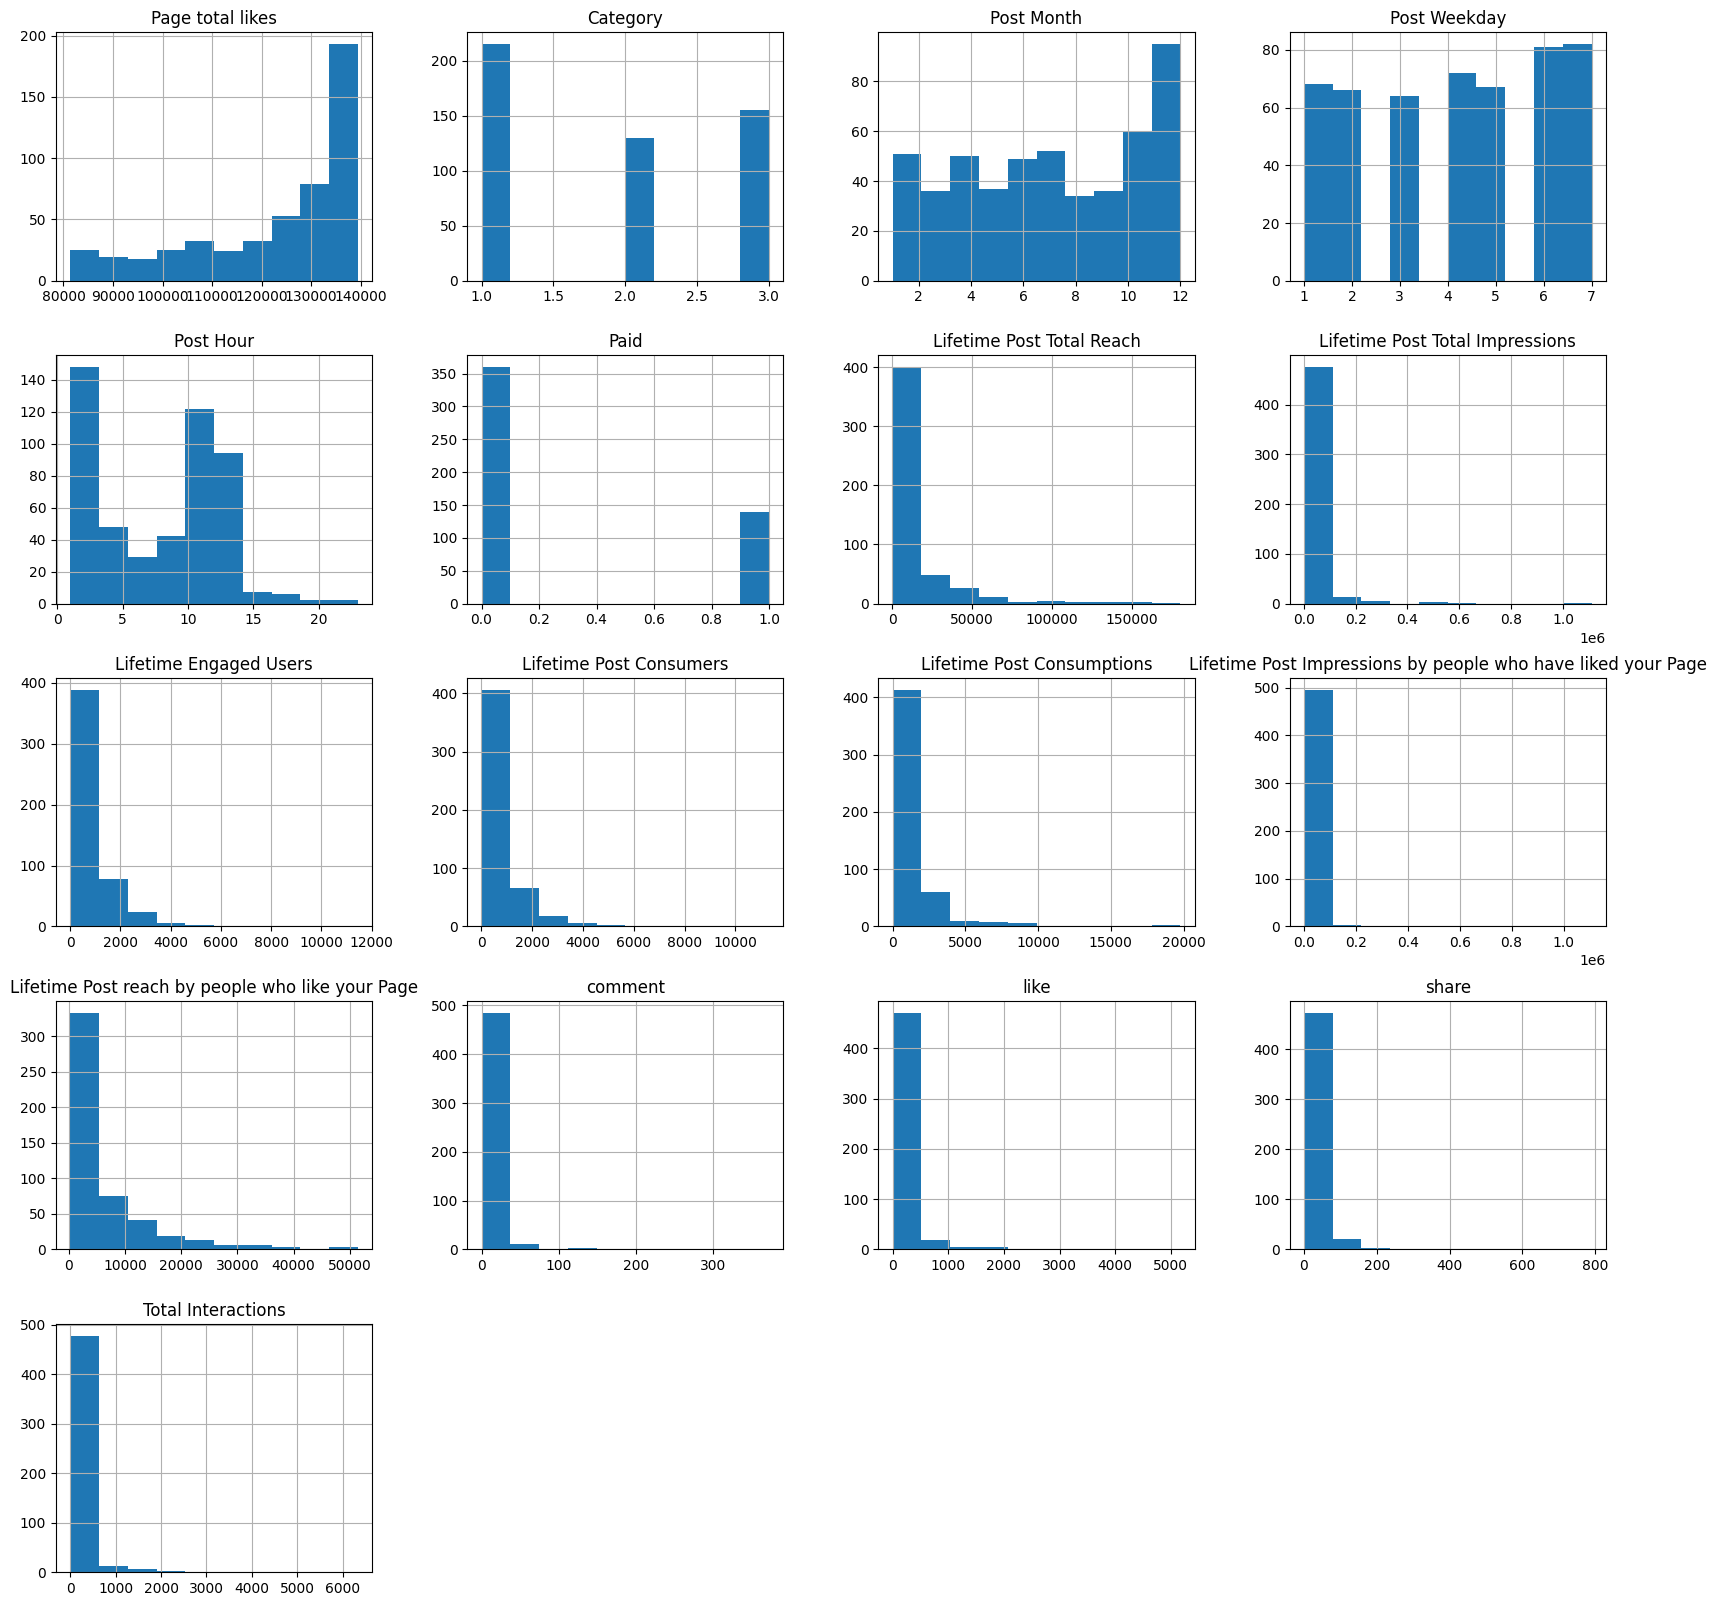

In [24]:
print(X.info())
X.hist(figsize=(20,20))

In [25]:
X.columns

Index(['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'Paid', 'Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page', 'comment', 'like',
       'share', 'Total Interactions'],
      dtype='object')

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder


cat_pipe = Pipeline(steps= [('Encoder',OneHotEncoder(drop='first'))])
cat_col = ['Type', 'Category', 'Paid']
column_transformer = ColumnTransformer(transformers=[('categoricas', cat_pipe, cat_col)])



#**Ejercicio-5.**

In [36]:
Xtt, Xtv, ytt, ytv = train_test_split(X_train, y_train, test_size= 100/len(y_train))
print(Xtt.shape)
print(Xtv.shape)

(300, 18)
(100, 18)


In [29]:
dummy_model = DummyRegressor()
dummy_model.fit(Xtt, ytt)

y_pred_tt  = dummy_model.predict(Xtt)
y_pred_tv  = dummy_model.predict(Xtv)
metricas_regresion(ytt, y_pred_tt, 'Entrenamiento').join(metricas_regresion(ytv, y_pred_tv, 'Validación'))


,Entrenamiento,Validación
RMSE,619.926871,436.972480
MAE,387.378311,337.678800
MAPE,118.563288,213.973036


#**Ejercicio-6.**

In [44]:
modelos = [LinearRegression(), RandomForestRegressor(), MLPRegressor(max_iter=10000)]
nombres = ['Regresión Lineal', 'Bosque Aleatorio', 'Perceptrón Multicapa']

for model, name in zip(modelos, nombres):
    modelo = Pipeline(steps= [('columns_transformer', column_transformer),
                                (name, model)])

    modelo.fit(Xtt, ytt)
    y_pred_tt  = modelo.predict(Xtt)
    y_pred_tv  = modelo.predict(Xtv)
    print(f'El performance del modelo de: {name}')
    print(metricas_regresion(ytt, y_pred_tt, 'Entrenamiento').join(metricas_regresion(ytv, y_pred_tv, 'Validación')))


El performance del modelo de: Regresión Lineal
      Entrenamiento  Validación
RMSE     469.867568  454.832982
MAE      283.341834  281.112110
MAPE     118.551711   62.300867
El performance del modelo de: Bosque Aleatorio
      Entrenamiento  Validación
RMSE     451.566958  458.286593
MAE      273.667745  293.141531
MAPE     115.681195   67.048233
El performance del modelo de: Perceptrón Multicapa
      Entrenamiento  Validación
RMSE     460.229664  454.182214
MAE      279.195986  284.744124
MAPE     120.388055   66.438856


#**Ejercicio-7.**

In [ ]:
None

#**Ejercicio-8.**

In [ ]:
None

#**Ejercicio-9.**

In [ ]:
None

#**Ejercicio-10.**

In [ ]:
None

#**Ejercicio-11.**

In [ ]:
None

#**Ejercicio-12.**

In [ ]:
None

###**Fin de la Actividad de la semana 7.**